<a href="https://colab.research.google.com/github/zhy22/9NbIoq57FQSMjNbD/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a rapidly expanding company in the **logistics and delivery sector**, we facilitate **on-demand delivery** for our clients by collaborating with various partners. Our swift growth has inherently presented us with a range of **operational challenges** that our team works to resolve daily. We recognize the necessity of quantifying and predicting **customer satisfaction**. Knowing what factors influence a customer's happiness or dissatisfaction is key, as it allows us to proactively implement necessary changes. While gathering direct **customer feedback** is often difficult, we prioritize this effort because the insights gained are vital for continuously improving our operational efficiency at every level.

In [ ]:
from google.colab import files
uploaded = files.upload()
#The code first reads customer survey data from the file

Saving train.csv to train.csv


# 1. Descriptive View

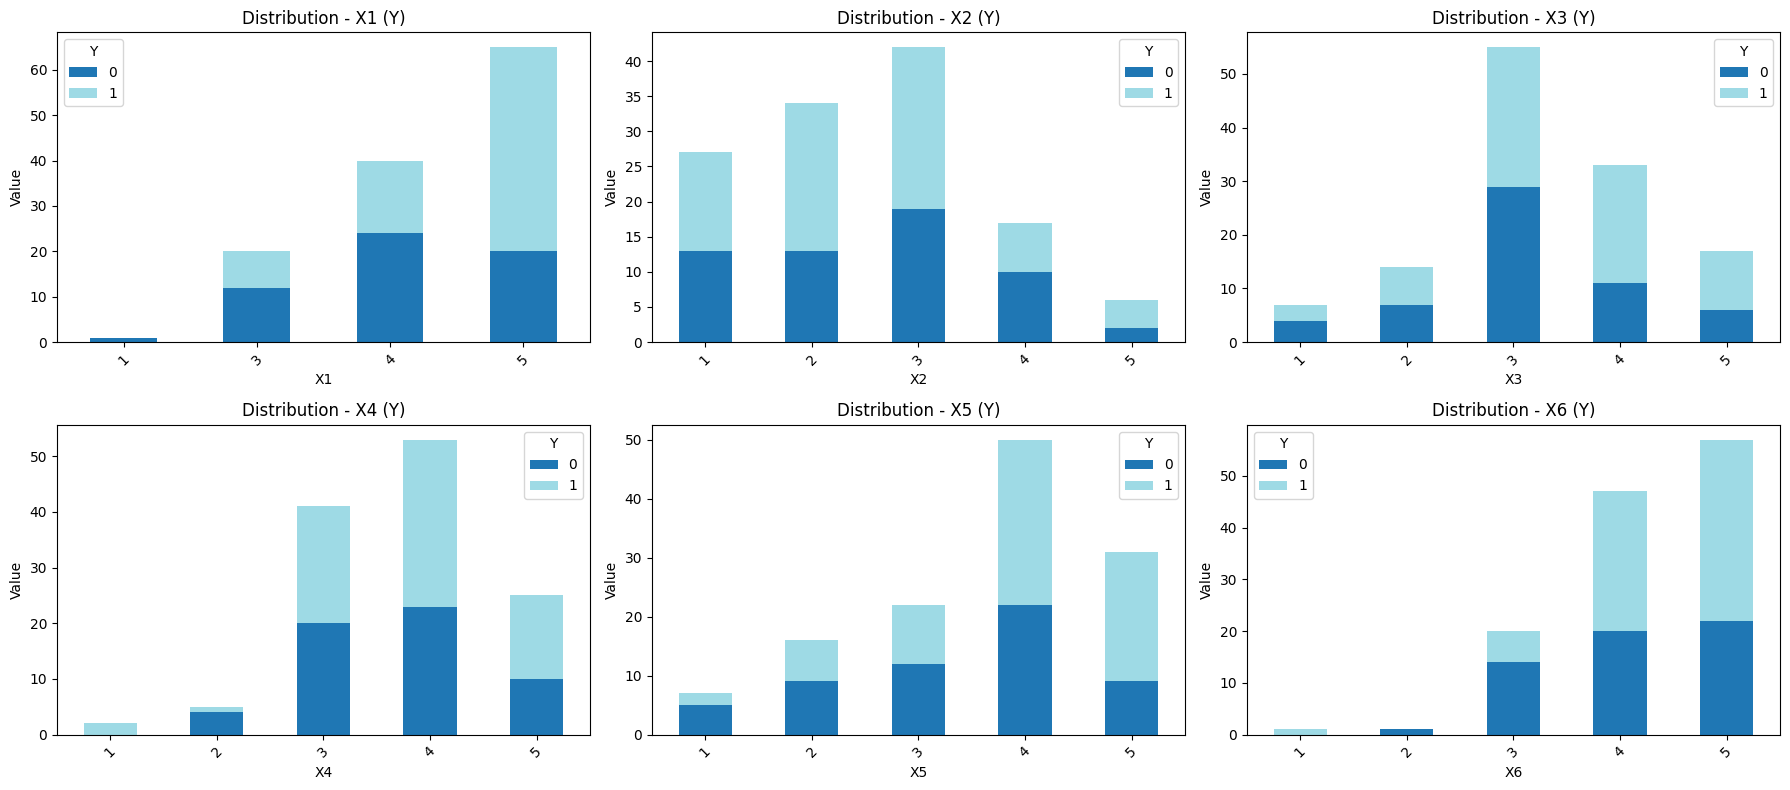

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

X = df[["X1", "X2", "X3", "X4", "X5", "X6"]].astype(str)
y = df["Y"].astype(int)

data = X.copy()
data["Y"] = y
# Create a figure (the entire image) and a set of axes (the individual plots).
# We want 2 rows and 3 columns to fit all 6 features, and we set the overall size.
fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(["X1", "X2", "X3", "X4", "X5", "X6"]):
    pd.crosstab(data[col], data["Y"]).plot(
        kind="bar",
        stacked=True,
        ax=axes[i],
        colormap="tab20"
    )
    axes[i].set_title(f"Distribution - {col} (Y)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")
    axes[i].legend(title="Y")
    axes[i].tick_params(axis='x', rotation=45)
# --- Final Presentation ---
plt.tight_layout()
plt.show()




X1: My order was delivered on time

X2: Contents of my order were as I expected

X3: I ordered everything I wanted to order

X4: I paid a good price for my order

X5: I am satisfied with my courier

X6: The app makes ordering easy for me

# 2.Recall Predictions

In [ ]:

import warnings
import numpy as np
import pandas as pd
import lazypredict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, make_scorer
from lazypredict.Supervised import LazyClassifier

warnings.filterwarnings("ignore")

data_path = "/content/train.csv"
df = pd.read_csv(data_path)
X = df[["X1", "X2", "X3", "X4", "X5", "X6"]]
#These are the inputs the models will use to make a prediction.
y = df["Y"].astype(int)
# this is what the models need to predict (the customer's satisfaction level, like happy or unhappy).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=1
)
# We divide all the data into two main piles
scaler = StandardScaler()
# Imagine the features have different scales (e.g., one feature ranges from 1 to 100, another from 0 to 1).
# The code uses a StandardScaler to normalize all the numbers so that no single feature dominates the model's attention just because it has bigger numbers.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=recall_score)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# When it's testing the models, it's told to primarily judge them based on a score called Recall.
# In the context of predicting unhappy customers, Recall is especially important because it measures the model's ability to correctly identify all the truly unhappy customers.
# We'd rather take action on a few customers who were actually happy (a false alarm) than miss a single customer who was truly unhappy.
recall_sorted = models[['recall_score']].sort_values(by='recall_score', ascending=False)
print(recall_sorted)


                               recall_score
Model                                      
DummyClassifier                        1.00
Perceptron                             0.79
QuadraticDiscriminantAnalysis          0.79
CalibratedClassifierCV                 0.71
SVC                                    0.68
GaussianNB                             0.68
LogisticRegression                     0.64
SGDClassifier                          0.64
LinearSVC                              0.64
LinearDiscriminantAnalysis             0.64
RidgeClassifier                        0.64
RidgeClassifierCV                      0.64
NearestCentroid                        0.61
BernoulliNB                            0.54
AdaBoostClassifier                     0.54
KNeighborsClassifier                   0.54
LGBMClassifier                         0.50
XGBClassifier                          0.46
ExtraTreeClassifier                    0.43
NuSVC                                  0.43
PassiveAggressiveClassifier     

To balance simplicity, interpretability, and reliability, we used three
models:
Logistic Regression: Provides a clear, mathematical explanation of
how each factor affects customer happiness.
Ridge Classifier: A variation of logistic regression that handles
overlapping or correlated factors more effectively.
Quadratic Discriminant Analysis (QDA): Captures more complex
patterns in customer behavior while still being fast to compute.
These models are well-suited for our data:
Small number of features (6 survey questions).
Closed-form, analytical solutions — meaning quick, reliable results.
Easy to interpret and communicate to business stakeholders.

# 3. Model Fitting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score, make_scorer
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


data_path = "/content/train.csv"
df = pd.read_csv(data_path)
X=df[["X1", "X2", "X3", "X4", "X5", "X6"]]
y=df["Y"].astype(int)
# Split the data into training and testing sets.
# test_size=0.4 means 40% of the data is held out for testing.
# stratify=y ensures the training and testing sets have the same proportion of Y=0 and Y=1.
# random_state ensures the split is the same every time the code runs.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=46
)
log_reg=LogisticRegression(max_iter=500)
ridge=RidgeClassifier()
qda=QuadraticDiscriminantAnalysis()

voting_clf=VotingClassifier(
    estimators=[
        ("qda", qda),
        ("log_reg", log_reg),
        ("ridge", ridge)
    ],
    voting="hard"
)
# Calculate the Recall score: a critical metric that measures how well the model
# identifies all actual positive cases (e.g., all truly unhappy customers).
voting_clf.fit(X_train, y_train)
y_pred_vote=voting_clf.predict(X_test)
recall_vote=recall_score(y_test, y_pred_vote)
print(f"Voting Classifier Recall: {recall_vote}")

# Initialize the Stacking Classifier. This is more advanced: it uses the predictions
# of the base models as *new inputs* for a 'final estimator' model.
stack_clf=StackingClassifier(
    estimators=[
        ("qda", qda),
        ("log_reg", log_reg),
        ("ridge", ridge)
    ],
    final_estimator=RandomForestClassifier(),
    passthrough=True
)

stack_clf.fit(X_train, y_train)
y_pred_stack=stack_clf.predict(X_test)
recall_stack=recall_score(y_test, y_pred_stack)

print(f"Stacking Classifier Recall: {recall_stack}")
# Create a dictionary of all models to test, including the individual ones and the ensembles

models={
    "QDA": qda,
    "LogReg": log_reg,
    "Ridge": ridge,
    "Voting": voting_clf,
    "Stacking": stack_clf
}

results={}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  results[name]=recall_score(y_test,y_pred)

best_model=max(results, key=results.get)
best_model=models[best_model]
print(f"Best Model: {best_model}")

print(f"results:{results}")





Voting Classifier Recall: 0.6428571428571429
Stacking Classifier Recall: 0.6785714285714286
Best Model: StackingClassifier(estimators=[('qda', QuadraticDiscriminantAnalysis()),
                               ('log_reg', LogisticRegression(max_iter=500)),
                               ('ridge', RidgeClassifier())],
                   final_estimator=RandomForestClassifier(), passthrough=True)
results:{'QDA': 0.4642857142857143, 'LogReg': 0.6428571428571429, 'Ridge': 0.6428571428571429, 'Voting': 0.6428571428571429, 'Stacking': 0.6785714285714286}


We measured model performance using the recall rate.
Recall measures how well the model identifies all unhappy
customers.
Our business goal is to reduce customer dissatisfaction.
Missing an unhappy customer is more costly than mislabeling a happy
one.
A higher recall rate means fewer unhappy customers go unnoticed —
enabling faster service recovery and process improvement

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, recall_score
scorer = make_scorer(recall_score, pos_label=0)

data_path = "/content/train.csv"
df = pd.read_csv(data_path)
X = df[["X1", "X2", "X3", "X4", "X5", "X6"]]
y = df["Y"].astype(int)

cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=8)


# --- Backward Selection Loop ---
# The loop continues as long as there is more than one feature remaining.
# We stop when only one feature is left, as we can't test its removal.
features = list(X.columns)
ranking = []
# Calculate the model's performance (Recall) using 5-fold cross-validation (cv=5)
        # The score measures how well the 'stack_clf' performs with the feature 'f' removed.
while len(features) > 1:
    scores = {}
    for f in features:
        reduced = [feat for feat in features if feat != f]
        score = cross_val_score(
            stack_clf,
            X[reduced],
            y,
            cv=cv,
            scoring=scorer,
        ).mean()
        scores[f] = score
    # Find the feature whose *removal* resulted in the *highest* Recall score.
    # This feature is the "worst" or "least important" because removing it hurt performance the least (or even improved it).
    worst_feature = max(scores, key=scores.get)
    ranking.append((worst_feature, scores[worst_feature]))
    features.remove(worst_feature)

ranking.append((features[0], None))

ranking_df = pd.DataFrame(ranking, columns=["Feature_Removed", "Recall_After_Removal"])
print(ranking_df)



  Feature_Removed  Recall_After_Removal
0              X4              0.545635
1              X6              0.567460
2              X3              0.686508
3              X2              0.527778
4              X5              0.382937
5              X1                   NaN


# 4. Results

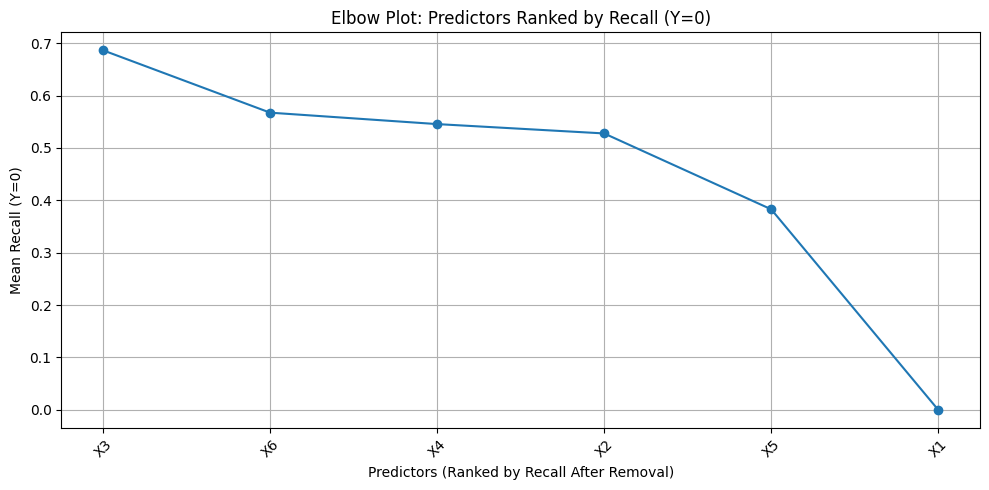

In [ ]:
import matplotlib.pyplot as plt

plot_df = ranking_df.copy()
# Handle missing values: If a feature removal test resulted in a missing Recall score (NaN),
# treat it as a 0 for plotting purposes (this step depends on how the ranking_df was created).
plot_df["Recall_After_Removal"] = plot_df["Recall_After_Removal"].fillna(0)
# Sort the data frame based on the key metric ("Recall_After_Removal").
# The highest Recall is placed first (ascending=False).
plot_df_sorted = plot_df.sort_values("Recall_After_Removal", ascending=False).reset_index(drop=True)
# --- Plotting the Elbow Curve ---

plt.figure(figsize=(10, 5))
plt.plot(
    plot_df_sorted["Feature_Removed"],
    plot_df_sorted["Recall_After_Removal"],
    marker='o',
    linestyle='-'
)

plt.title("Elbow Plot: Predictors Ranked by Recall (Y=0)")
plt.xlabel("Predictors (Ranked by Recall After Removal)")
plt.ylabel("Mean Recall (Y=0)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




The analysis shows that three operational areas have the strongest
influence on customer dissatisfaction:
1 Delivery Timeliness: Late deliveries are the most common driver of
unhappiness. Customers expect reliability, and delays directly erode
trust in the service.
2 Order Accuracy: Incorrect or incomplete orders significantly impact
satisfaction. Even small mismatches between what was ordered and
what was received create frustration and increase support costs.
3 Courier Service Quality: The delivery experience itself—courier
professionalism, attitude, and communication—strongly shapes how
customers perceive our brand.
These insights suggest that operational improvements should
prioritize:
Strengthening last-mile logistics to reduce delivery delays.
Enhancing order verification and fulfillment accuracy through better
warehouse and partner coordination.
Investing in courier training, incentives, and service standards to
elevate the customer experience at the doorstep.


Current Limitation: The analysis is based on a relatively small
sample size from a select customer cohort. While findings are
directional and actionable, broader conclusions require more data
across different regions, partners, and service types.